# Animal Outcomes

Tidy Tuesday contribution for Australian Animals Outcomes - more info is available at the below:

https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-21/readme.md 

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import seaborn as sns

sns.set_style("whitegrid")

animal_outcomes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-21/animal_outcomes.csv')
animal_complaints = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-21/animal_complaints.csv')
brisbane_complaints = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-21/brisbane_complaints.csv')

In [172]:
# Data Cleaning Steps

# Recode levels of outcome 
outcomes_dict = {"Reclaimed" : "Reclaimed", 
                 "Rehomed" : 'Rehomed',
                 "Other" : 'Other',
                 'Euthanized': 'Euthanized',
                 "Released" : "Other",
                 "In Stock" : "Other",
                 "Transferred" : 'Other', 
                 'Currently In Care' : "Other"
                }

animal_outcomes["outcome"] = animal_outcomes["outcome"].map(outcomes_dict)

Text(55.623645486111116, 0.5, '# of Animals')

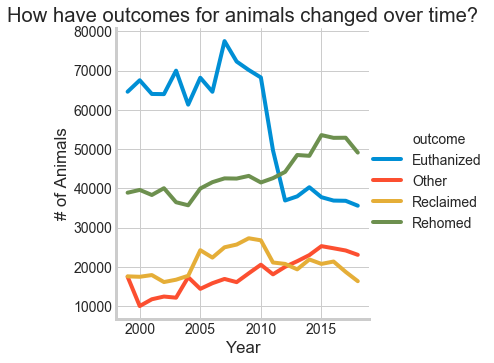

In [173]:
# Plot animal outcomes over time
outcomes_by_year = animal_outcomes[["year", "outcome", "Total"]].groupby(["year", "outcome"])["Total"].sum().reset_index()

sns.relplot(x="year", y="Total", hue ="outcome", kind="line", data=outcomes_by_year)
plt.title("How have outcomes for animals changed over time?")
plt.xlabel("Year")
plt.ylabel("# of Animals")

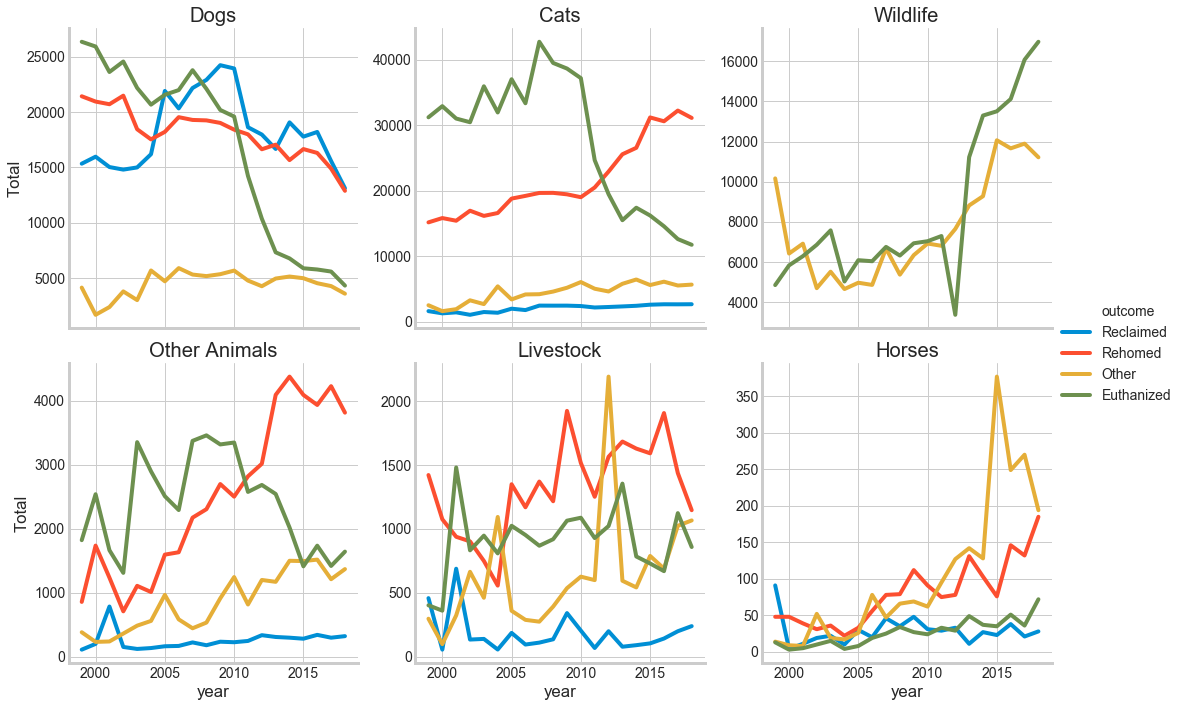

In [219]:
animal_order = animal_outcomes.groupby(["animal_type"])["Total"].sum().sort_values(ascending=False)


g = sns.relplot(x="year", y="Total", hue="outcome", col="animal_type", col_order = animal_order.index,
            data=animal_outcomes, kind="line", col_wrap=3, estimator=sum, ci=None, 
            facet_kws=dict(sharey=False))

axes = g.axes.flatten()
axes[0].set_title(animal_order.index[0])
axes[1].set_title(animal_order.index[1])
axes[2].set_title(animal_order.index[2])
axes[3].set_title(animal_order.index[3])
axes[4].set_title(animal_order.index[4])
axes[5].set_title(animal_order.index[5])

Text(0.5, 1.0, 'Proportion of all animal outcomes each year')

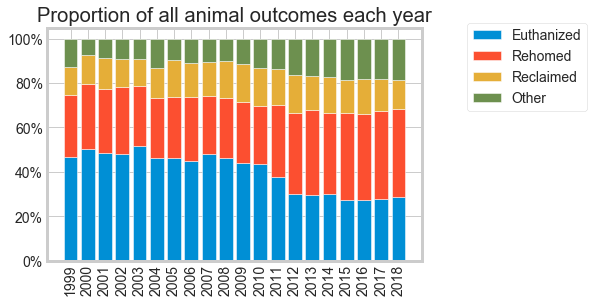

In [165]:
total_animals = pd.DataFrame(outcomes_by_year.groupby(["year"])["Total"].sum())
total_animals = pd.merge(outcomes_by_year, total_animals, on="year", suffixes=["_within_outcome", "_overall"])
total_animals["prop"] = total_animals["Total_within_outcome"] / total_animals["Total_overall"]

values = {}

for outcome in total_animals["outcome"].unique():
    results = total_animals[total_animals["outcome"] == outcome]["prop"] * 100
    results.index = range(len(results.index))
    values[outcome] = results
    
fig, ax = plt.subplots()

ax.bar(total_animals["year"].unique(), values["Euthanized"], label = "Euthanized")
ax.bar(total_animals["year"].unique(), values["Rehomed"], bottom = values["Euthanized"], label = "Rehomed")
ax.bar(total_animals["year"].unique(), values["Reclaimed"], bottom = values["Euthanized"] + values["Rehomed"], 
      label = "Reclaimed")
ax.bar(total_animals["year"].unique(), values["Other"], bottom = values["Euthanized"] + values["Rehomed"] +
      values["Reclaimed"], label="Other")

plt.xticks(range(1999, 2019), rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Proportion of all animal outcomes each year")

Text(0.5, 1, 'Horses')

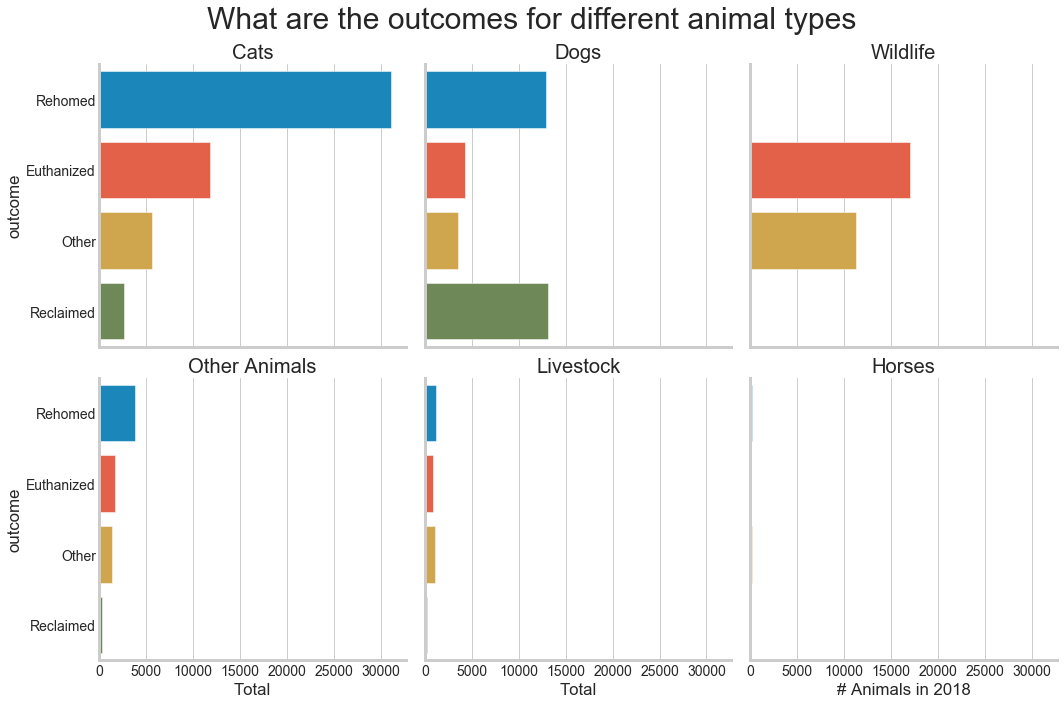

In [253]:
max_year_animals = animal_outcomes[animal_outcomes["year"] == animal_outcomes["year"].max()]

outcome_order = max_year_animals.groupby(["outcome"])["Total"].sum().sort_values(ascending=False)
animal_order = max_year_animals.groupby(["animal_type"])["Total"].sum().sort_values(ascending=False)

g = sns.catplot(x="Total", y="outcome", order = outcome_order.index,
            kind="bar", data=max_year_animals, ci=None, estimator=sum, 
            col_order = animal_order.index,
            col="animal_type", col_wrap=3)

plt.xlabel("# Animals in 2018")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('What are the outcomes for different animal types', fontsize=30)

axes = g.axes.flatten()
axes[0].set_title(animal_order.index[0])
axes[1].set_title(animal_order.index[1])
axes[2].set_title(animal_order.index[2])
axes[3].set_title(animal_order.index[3])
axes[4].set_title(animal_order.index[4])
axes[5].set_title(animal_order.index[5])

In [300]:
# Analysis by State
by_state = pd.melt(animal_outcomes,
        id_vars = ["year", "animal_type", "outcome", "Total"], 
        value_vars=["ACT", "NSW", "NT", "QLD", "SA", "TAS", "VIC", "WA"],
        value_name = "n", var_name = "state"
       ).sort_values(["year", "animal_type", "outcome"])

by_state = by_state.set_index("year")

by_state.loc["2018"].groupby("state")["n"].sum().sort_values(ascending=False)


state_data = {
    "Population" : {"QLD" :  1,
                    "NT" : 2,
                    "VIC" : 3,
                    "SA" : 4,
                    "ACT" : 5,
                    "WA" : 6,
                    "TAS" : 7,
                    "NSW" : 8},
    "Area" : {"QLD" :  1,
             "NT" : 2,
             "VIC" : 3,
             "SA" : 4,
             "ACT" : 5,
             "WA" : 6,
             "TAS" : 7,
             "NSW" : 8}
}

state_data = pd.DataFrame(state_data).reset_index()

by_state = pd.merge(by_state, state_data, left_on="state", right_on="index", how ='left')

